In [1]:
import mglearn
import graphviz
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [2]:
import warnings
warnings.filterwarnings('ignore')

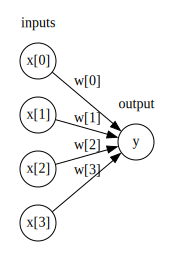

In [3]:
display(mglearn.plots.plot_logistic_regression_graph())
#output is a weighted sum of the inputs. 
#In an MLP this process of computing weighted sums is repeated multiple times.

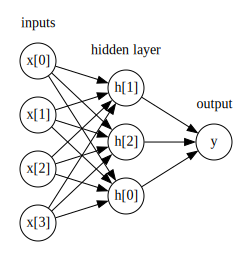

In [4]:
display(mglearn.plots.plot_single_hidden_layer_graph())

#there is one between every input and every hidden unit, and one between every unit in the hidden layer and the output.
#Computing a series of weighted sums is mathematically the same as computing just one weighted sum, so to make this model truly more powerful than a linear model.

Text(0, 0.5, 'relu(x), tanh(x)')

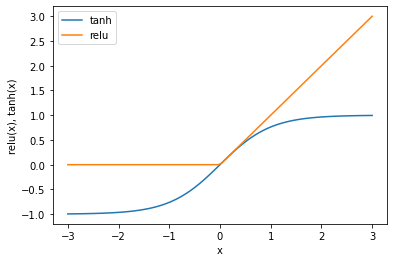

In [5]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0), label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

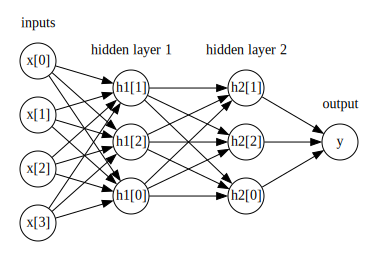

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

### Tuning neural networks

In [7]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons #make_moons displays 2 disjunctive clusters of data in a 2-dimensional representation space

Text(0, 0.5, 'Feature 1')

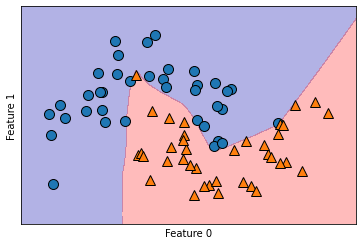

In [8]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

#I changed algorithm with solver and l-bfgs with lbfgs, otherwise it gave me error.

#the neural network learned a very nonlinear but relatively smooth decision boundary.
#By default, the MLP uses 100 hidden nodes.

Text(0, 0.5, 'Feature 1')

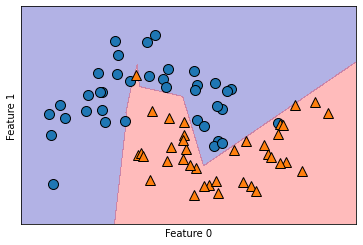

In [9]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10]) #I added 10 hidden layers 
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

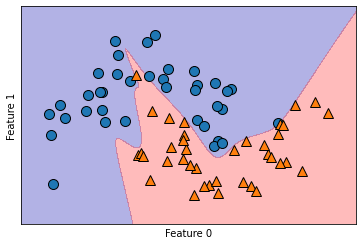

In [10]:
mlp = MLPClassifier(solver='lbfgs', activation='tanh',random_state=0, hidden_layer_sizes=[10, 10]) #2 hidden layers with 10 units
mlp.fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

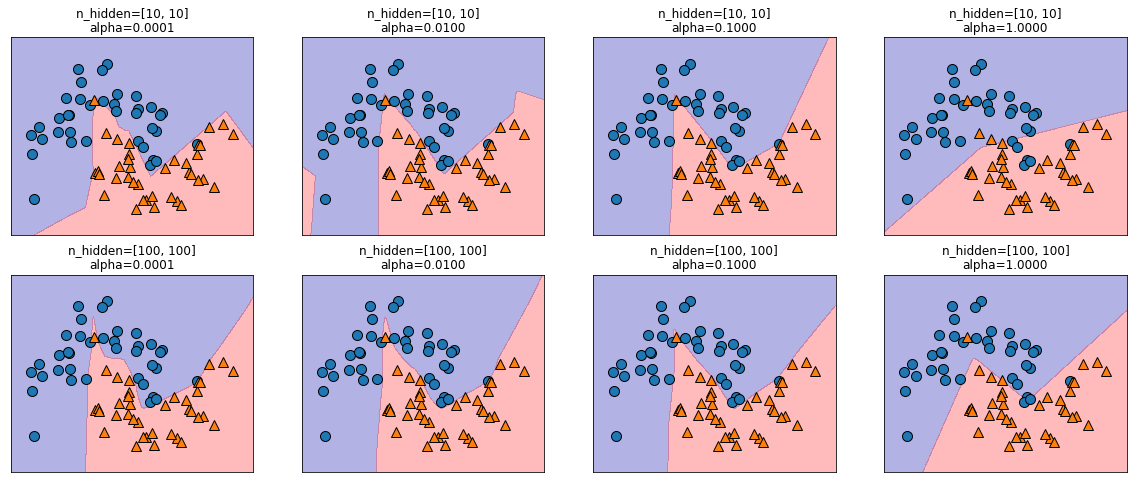

In [11]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for axx, n_hidden_nodes in zip(axes, [10, 100]): #different numbers of hidden layers and different alpha values
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
        hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],alpha=alpha)
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
        mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)
        ax.set_title("n_hidden=[{}, {}]\nalpha={:.4f}".format(n_hidden_nodes, n_hidden_nodes, alpha))

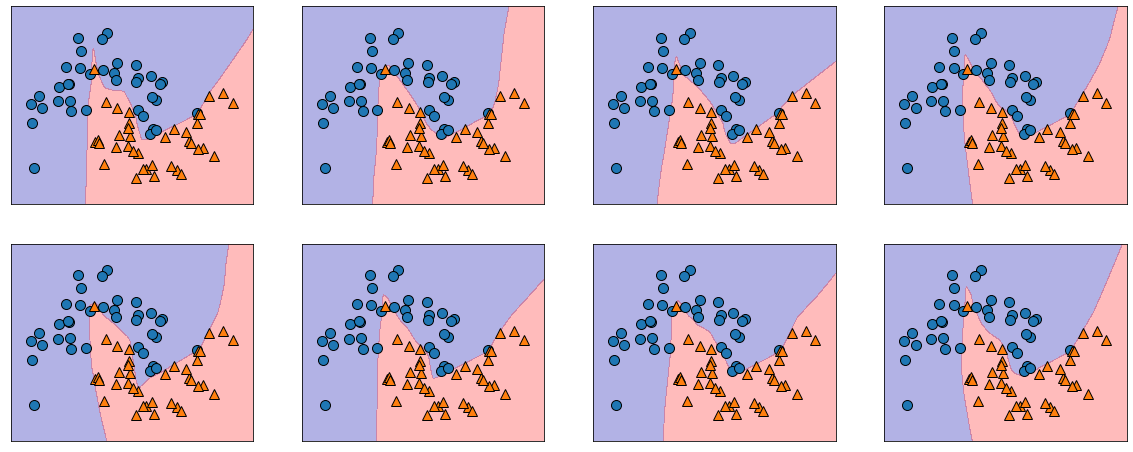

In [12]:
#same parameters but different random initializations
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
for i, ax in enumerate(axes.ravel()):
    mlp = MLPClassifier(solver='lbfgs', random_state=i,hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3, ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train, ax=ax)

##### Impact of hidden layer sizes on decision boundary 
>the number of the hidden layers effect the decision boundary. Increasing the number of hidden layers increase complexity of the model and the time as well but it also increase the accuracy.   
When I added one hidden layer with 10 hidden units, the decision boundary looks more ragged. Adding more layers provided smoother decision boundary like in the second model which has two hidden layers with 10 units. In addition without changing the alpha, increasing 10 units to 100 units makes model more smooth and accurate. 
The number of hidden layer sizes chosen for the model is important to balance the complexity and accuracy of the model 

##### Effect of alpha
>Alpha is a parameter for regularization term (penalty term) that combats overfitting by constraining the size of the weights. Increasing alpha may control high variance which is a sign of overfitting and makes decision boundary lesser curvatures. Similarly, decreasing alpha may control high bias which is a sign of underfitting and results with a more complicated decision boundary. When I looked at the graphs which has alpha value between 0.0001 to 1, I saw that when alpha increases, the decision boundary becomes smoother and more stable


### Breast Cancer Data Set 

In [13]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

In [14]:
print("Cancer data per-feature maxima:\n{}".format(cancer.data.max(axis=0)))

Cancer data per-feature maxima:
[2.811e+01 3.928e+01 1.885e+02 2.501e+03 1.634e-01 3.454e-01 4.268e-01
 2.012e-01 3.040e-01 9.744e-02 2.873e+00 4.885e+00 2.198e+01 5.422e+02
 3.113e-02 1.354e-01 3.960e-01 5.279e-02 7.895e-02 2.984e-02 3.604e+01
 4.954e+01 2.512e+02 4.254e+03 2.226e-01 1.058e+00 1.252e+00 2.910e-01
 6.638e-01 2.075e-01]


In [15]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=101)
mlp= MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print("Accuracy on training set: {:.2f}".format(mlp.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(mlp.score(X_test, y_test)))

Accuracy on training set: 0.95
Accuracy on test set: 0.96


In [16]:
# I scaled data to increase accuracy 

#compute the mean value per feature on the training set
mean_on_train = X_train.mean(axis=0)
# compute the standard deviation of each feature on the training set
std_on_train = X_train.std(axis=0)

# subtract the mean, and scale by inverse standard deviation
# afterward, mean=0 and std=1
X_train_scaled = (X_train - mean_on_train) / std_on_train
# use THE SAME transformation (using training mean and std) on the test set
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [17]:
mlp = MLPClassifier(max_iter=1000, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.972


In [18]:
#I changed the alpha

mlp = MLPClassifier(max_iter=1000, alpha=1, random_state=0)
mlp.fit(X_train_scaled, y_train)
print("Accuracy on training set: {:.3f}".format(
mlp.score(X_train_scaled, y_train)))
print("Accuracy on test set: {:.3f}".format(mlp.score(X_test_scaled, y_test)))

Accuracy on training set: 0.984
Accuracy on test set: 0.986


##### Effect of alpha
>Increasing the number of iterations only increased the training set performance, not the generalization performance. When I only increased the iterations there was a bigger gap between the training and the test performance. To decrease the gap, I added alpha which helps model get better generalization performance. 

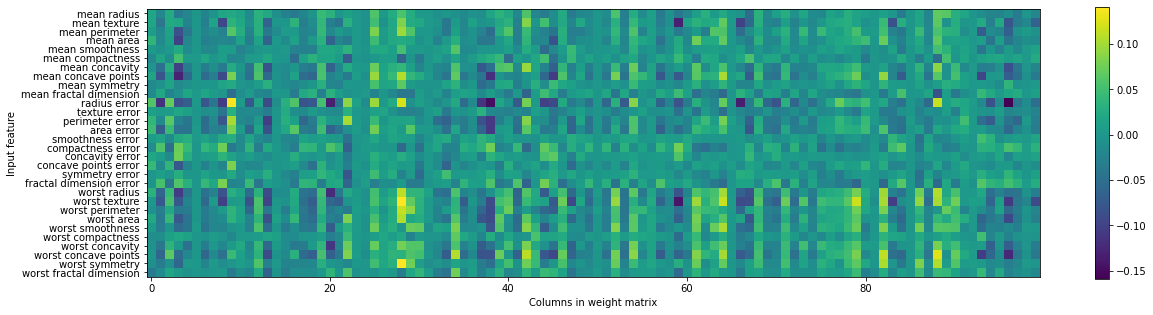

In [19]:
#heat map
plt.figure(figsize=(20, 5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel("Columns in weight matrix")
plt.ylabel("Input feature")
plt.colorbar()

### Decision Tree 

Accuracy on training set: 1.000
Accuracy on test set: 0.923


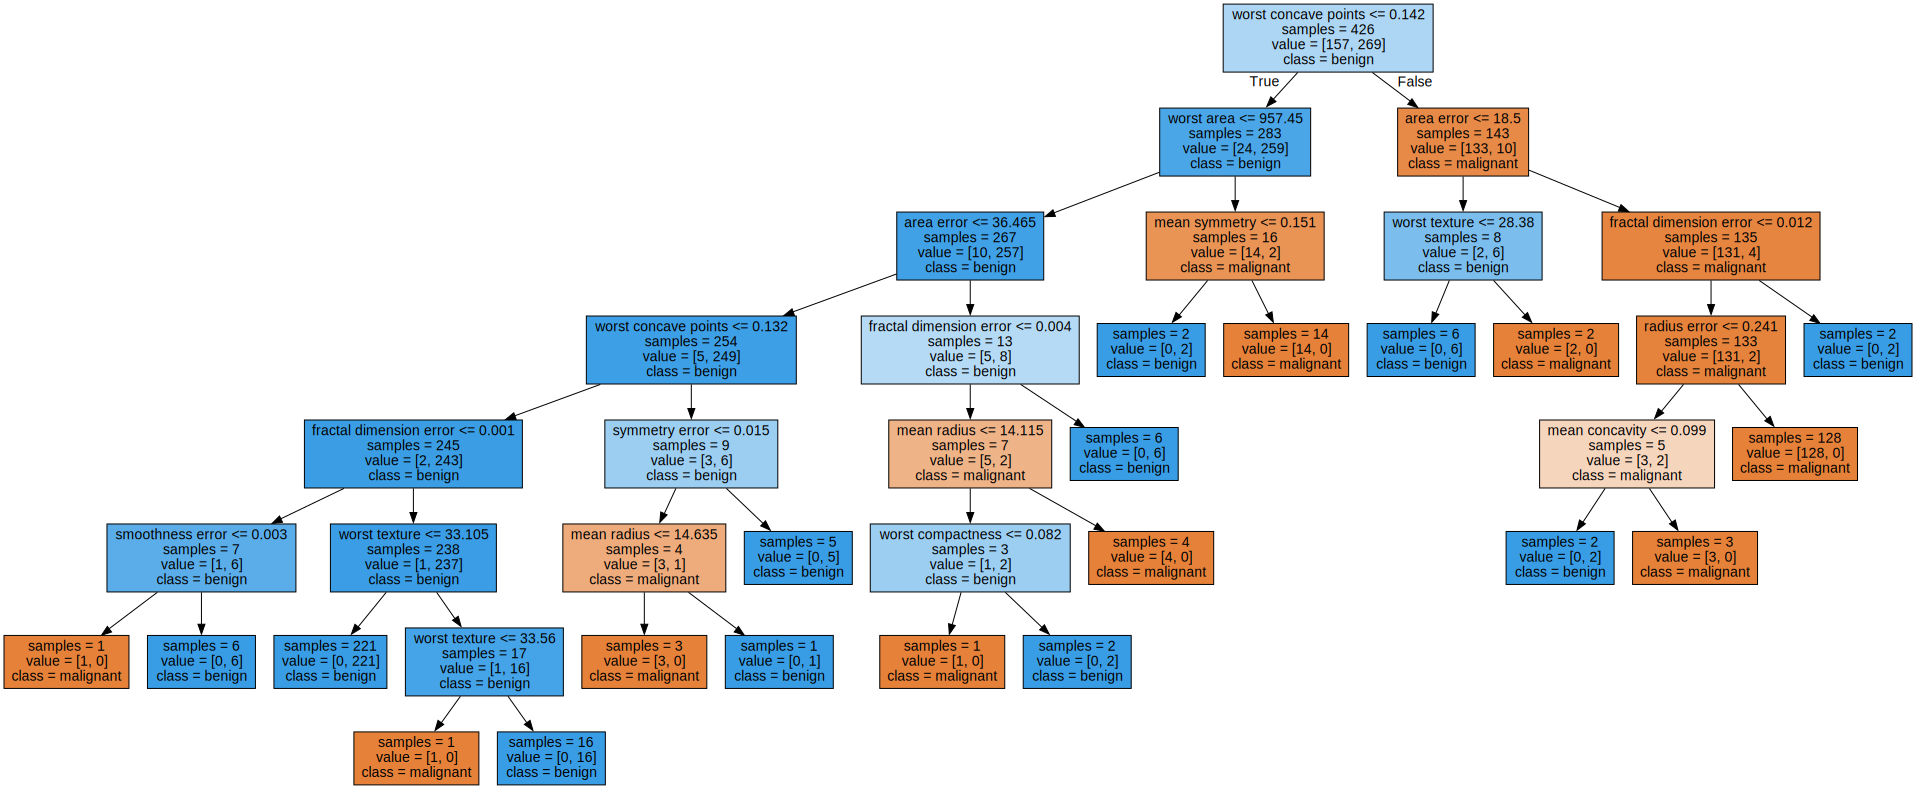

In [20]:
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=101)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_cancer.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

with open("tree_cancer.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=101)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [22]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.923


In [23]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree_cancer.dot", class_names=["malignant", "benign"], feature_names=cancer.feature_names, impurity=False, filled=True)

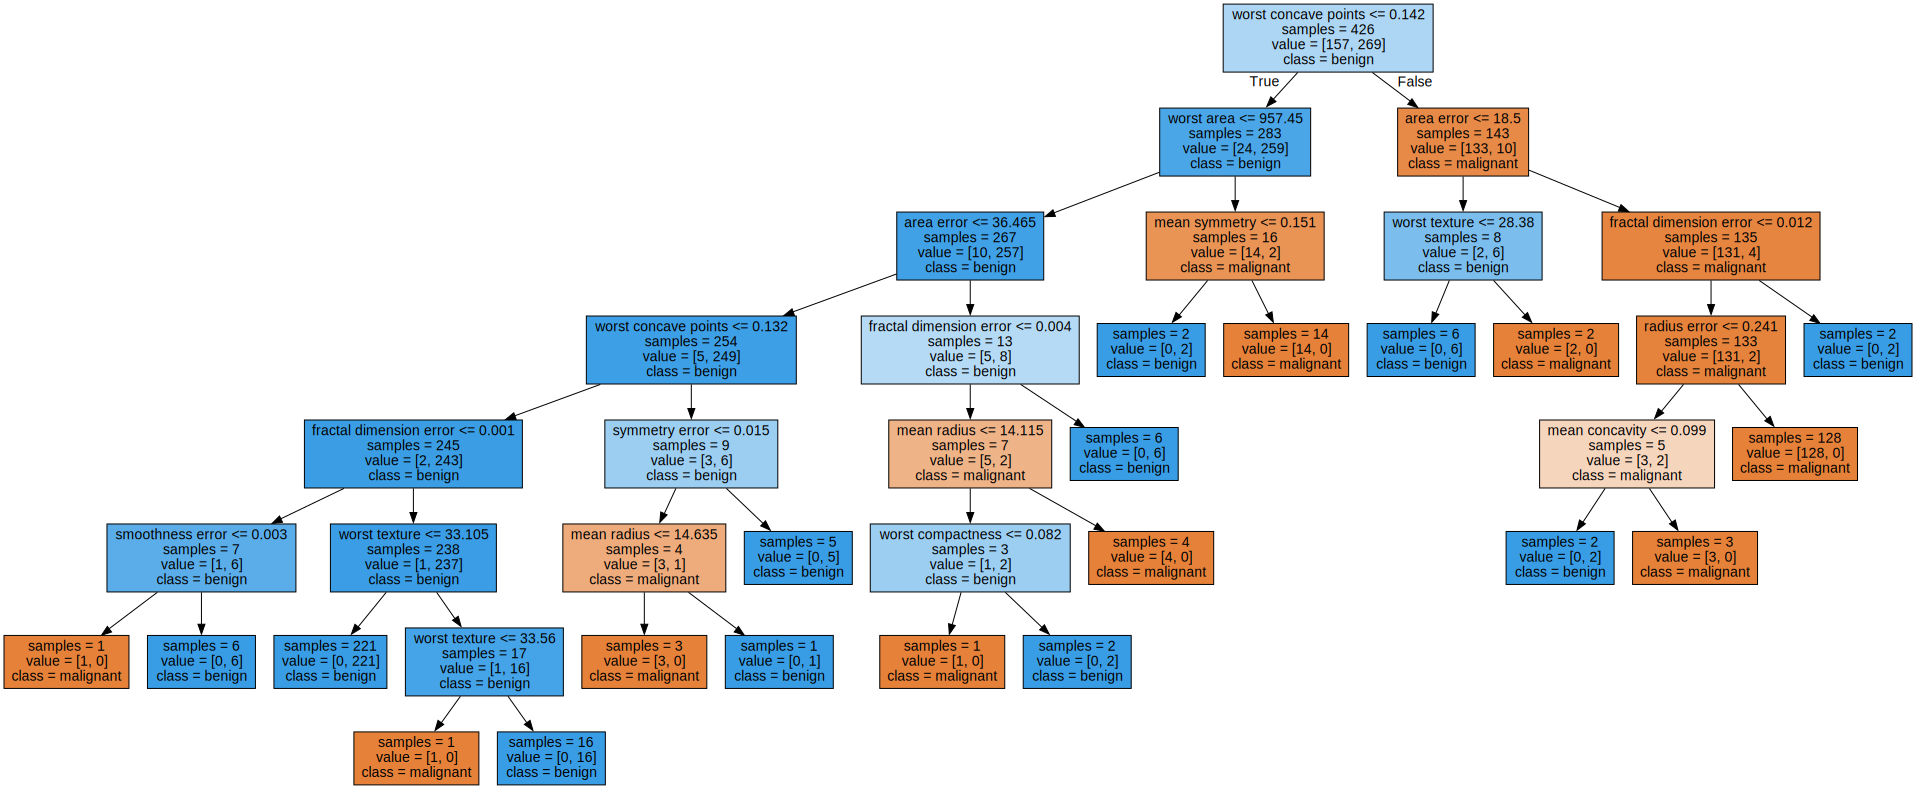

In [24]:
with open("tree_cancer.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

##### Multilayer perceptron (MLP) and support vector machine (SVM) comparison 

##### Similarities:
    - Both of them can be used for classification and regression tasks.
    - Both can be used for non-linear relationships between input and output variables.
    - Both require training on labeled data to learn the underlying patterns and make predictions.

##### Differences:
    - SVM is a type of kernel-based algorithm, while MLP is a type of artificial neural network 
    - MLP can have multiple hidden layers, while SVM only has one decision boundary.
    - MLP can be prone to overfitting, while SVM is less prone to overfitting due to its regularization parameter.
    - SVM is known to perform better in high-dimensional data, while MLP can be more flexible in handling complex datasets.